In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')
planets = pd.read_excel('../data/planets_moons.xlsx', index_col=0)

# Entry 6 - EDA with correlation

## The Problem

In <font color='red'>Entry 5 </font> I started EDA (exploratory data analysis) using descriptive statistics and visualizations. However, this is a very manual process. My coworker [Sabber](https://medium.com/@sabber) suggested using correlation to help sort out the wheat from the chaff.

## The Options

There are different options for how to measure correlation. Some are better at detecting certain kinds of relationships than others.



Sabber and I discussed three types of [correlation analysis](https://www.stat.cmu.edu/~ryantibs/datamining/lectures/11-cor2.pdf):
- [Pearson](https://www.spss-tutorials.com/pearson-correlation-coefficient/)
- [Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)
- [Maximal](http://proceedings.mlr.press/v32/nguyenc14.pdf)

### Pearson

This correlation measure is best at detecting linear relationships. It is generally considered the most common statistical measure (it certainly has the longest Wikipedia page of the three) and is generally the default method for most correlation functions.

This measure is best at finding relationships like the one between mass_1024kg and atmospheric_mass_kg.

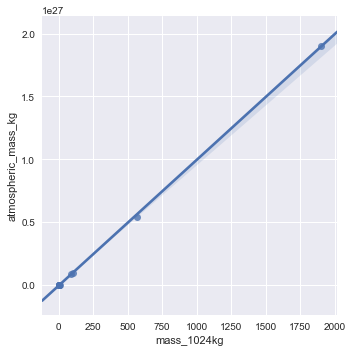

In [2]:
sns.lmplot(x='mass_1024kg', y='atmospheric_mass_kg', data=planets)

### Spearman

This correlation measure uses rank order to determine correlation and can find non-linear as well as linear relationships.

This measure can find relationships like the one above between mass_1024kg and atmospheric_mass_kg, but it can also find relationships exhibiting the power law like that between mass_1024kg and diameter_kg.

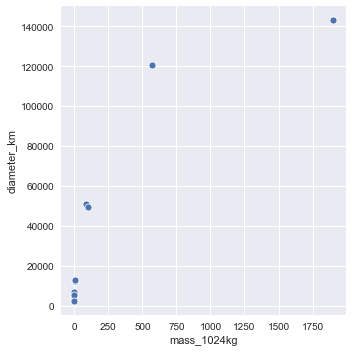

In [4]:
sns.relplot(x='mass_1024kg', y='diameter_km', data=planets, kind='scatter')

### Maximal

This is the most flexible of the correlation measures. Pearson and Spearman have difficulty with relationshipships such as circular and quadric. Some of the limitations of Pearson can be seen in the following image (1 is a perfect positive relationship, 0 is no relationship, and -1 is a perfect negative relationship):

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1920px-Correlation_examples2.svg.png" width=600 style="margin:6px 6px">

Maximal correlation is designed to characterize independence completely, which would find the relationships left on the table by Pearson and Spearman. I didn't dive too deep into this measure, but there seem to be different versions of it. Sabber and I discussed ACE (alternating conditional expectations), but the link I provided above discussed a MAC (maximal multivariate correlation analysis - don't ask me how they came up with their acronym, I have no idea) version.

## The Proposed Solution

Maximal correlation seems like the obvious solution: it finds the same relationships as the other two as well as relationships the others miss. Unfortunately, there isn't a ready made implementation of this measure. In the spirit of 'each mini-project should take 1-2 hours including the write-up' I'm taking Maximal off the table. That said, being the curious bugger I am, I'd like to see how Pearson and Spearman compare.

In Python, the only difference between using the Pearson and Spearman methods is whether the 'method' parameter is left blank or is set equal to Spearman for either the corr() or corrwith() functions. As such, I ran both and compared the results. They're pretty similar, but Spearman does appear to provide a better measure of importance in the majority of cases. The notebook with all the code is in the <font color='red'>supplementary Entry 6 notebook</font>.

## The Fail

I'm not entirely comfortable leaving off visualization completely. It feels like something that will come back and bite me later. Both the automated/mathematical and the manual/visualization methods have drawbacks.

There is a finite amount of time a person can realistically devote to exploring data by hand with visualizations. People are also more likely to concentrate on features they think are more important. For example, I didn't look at day length or number of moons at all in my analysis. These features may be a proxy for mass (the larger planets are farther out with longer days and large planets tend to capture more moons), but they may be just different enough that it may be easier for a model to use than a more 'common sense' feature.

The best course of action while refining my process is to keep in mind the pros and cons of both manual and mathematical methods. Hopefully, a solution will evolve naturally as I apply it to a variety of datasets.

The process as it stands has helped me develop a more reasonable list of features that are related to my feature of interest. However, this hasn't addressed how the features are related to each other. If I remember correctly from that statistics class during my graduate work, collinearity (prediction features being correlated) can mess up predictions.

## Next Up

Reviewing collinearity.

### Resources

- [Carnegie Mellon Univeristy Data Mining course notes](https://www.stat.cmu.edu/~ryantibs/datamining/)
- [Multivariate Maximal Correlation Analysis paper](http://proceedings.mlr.press/v32/nguyenc14.pdf)